# HW10 Kernels and Neural Networks

### Q1. (4 points) 

#### a) This question looks at the idea of kernels, which are useful for SVM and in general. Understanding kernels better would serve you well for neural networks too. Load the plots in the cell below. Can you separate the classes with a hyperplane? Explain. If not, make your function separate the different classes in each part by changing the representation of the data—in other words, by projecting the data to a (potentially nonlinear) space, where separatation using a hyperplane would be possible. The classes are designated by different colors: red and blue in Part A and red, blue, and green in Part B. 


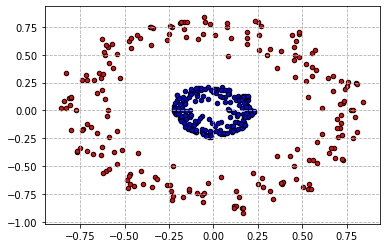

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
plt.style.use('default')
%matplotlib inline

# Part a
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.2, noise=.05)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
reds = y == 0
blues = y == 1
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.grid(linestyle='--')

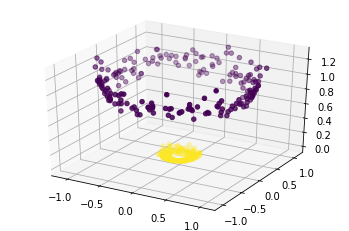

In [2]:
# Code here for figure(a)
from sklearn import svm 
from mpl_toolkits.mplot3d import Axes3D 

def project(X,y):
    # Adding a new dimension to X 
    X1 = X[:, 0].reshape((-1, 1)) 
    X2 = X[:, 1].reshape((-1, 1)) 
    X3 = (X1**2 + X2**2) 
    X = np.hstack((X, X3)) 
    
    # Visualizing data in higher dimension 
    fig = plt.figure() 
    axes = fig.add_subplot(111, projection = '3d') 
    axes.scatter(X1, X2, X1**2 + X2**2, c = y, depthshade = True) 
    plt.show() 

project(X,y)

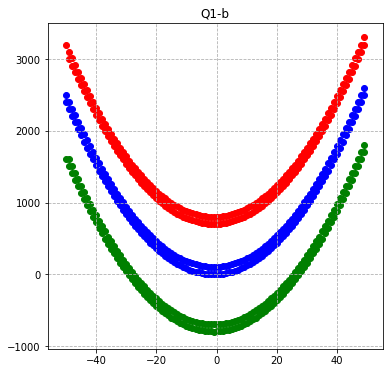

In [3]:
# Part b
data = np.loadtxt('data1.csv')
plt.figure(figsize=(6, 6))
plt.scatter(data[201:400, 0], data[201:400, 1], c = 'red')
plt.scatter(data[:200, 0], data[:200, 1], c = 'blue')
plt.scatter(data[401:, 0], data[401:, 1], c = 'green')
plt.grid(linestyle='--')
plt.title('Q1-b')
plt.show()

In [4]:
# Code here for figure(b)

x1 = data[201:400, 0]
y1 = data[201:400, 1]

x2 = data[:200, 0]
y2 = data[:200, 1]

x3 = data[401:, 0]
y3 = data[401:, 1]

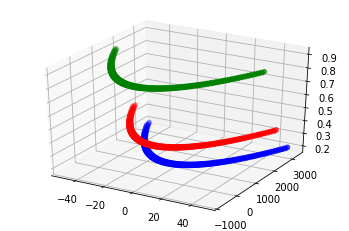

In [5]:
def project2(x1, y1, x2, y2, x3, y3):
    # Adding a new dimension to X 
    xnew1 = x1.reshape((-1, 1)) 
    ynew1 = y1.reshape((-1, 1)) 
    first_X3 = (xnew1**2 + ynew1**2) 
    X1 = np.hstack((xnew1, first_X3)) 
    
    xnew2 = x2.reshape((-1, 1)) 
    ynew2 = y2.reshape((-1, 1)) 
    second_X3 = (xnew2**2 + ynew2**2) 
    X2 = np.hstack((xnew2, second_X3)) 
    
    xnew3 = x3.reshape((-1, 1)) 
    ynew3 = y3.reshape((-1, 1)) 
    third_X3 = (xnew3**2 + ynew3**2) 
    X3 = np.hstack((xnew3, third_X3)) 

    # Visualizing data in higher dimension 
    fig = plt.figure() 
    axes = fig.add_subplot(111, projection = '3d') 
    axes.scatter(xnew1, ynew1, 0.2, c = 'b')
    axes.scatter(xnew2, ynew2, 0.4, c = 'r')
    axes.scatter(xnew3, ynew3, 0.9, c = 'g')
    plt.show() 
    
project2(x1,y1,x2,y2,x3,y3)

### Q2. (4 points) 

#### a) The Perceptron algorithm is the simplest type of artificial neural network. Implement the perceptron below.

In [6]:
# Code here 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def perceptron(X, y, eta, t):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5)
    # initializing the weights
    w = np.zeros(len(xtrain[0]))      
    n = 0                        
    
    while n < t:          
        for i in range(0, len(xtrain-1)):                                           
            f = np.dot(xtrain[i], w)                                           
            if f > 0.1:                               
                yhat = 1                               
            else:                                   
                yhat = 0
            w = w + eta*(ytrain[i]-yhat)*xtrain[i]
        n += 1
        
    y_pred = np.array([])
    for i in range(0, len(xtest-1)):
        f = np.dot(xtest[i], w)   
        
        if f > 0.1:                               
            yhat = 1                               
        else:                                   
            yhat = 0
        y_pred= np.append(y_pred, yhat)
        
    acc = accuracy_score(ytest, y_pred)
    return y_pred, acc

#### b) Now run the below cell. Can your implemented perceptron separate the below data(X)? If it can, how many iterations did it take. If it took a lot of iterations, speculate on why that happens. If it cannot, explain why not. 


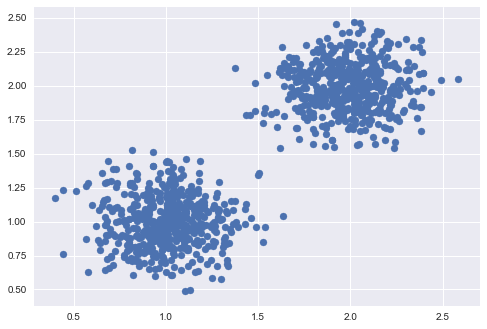

In [7]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
plt.style.use('seaborn')

centers = [[1, 1],  [2,2]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.2)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [8]:
#### code here for Q2-b
eta = 0.1
t = 10
ypred, a = perceptron(X, y, eta, t)
print("The accuracy is", a)

The accuracy is 1.0


In [9]:
from sklearn.linear_model import Perceptron

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5)

clf = Perceptron(random_state = 0, max_iter = t)
clf.fit(xtrain, ytrain)
ypred2 = clf.predict(xtest)

accuracy_score(ypred2, ytest)

1.0

### Q3. (2 points)

#### Can your perceptron from Q2a seperate XOR and XNOR? Explain why it can or cannot.


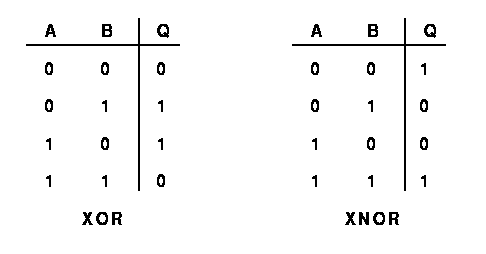

In [10]:
from IPython.display import Image
Image("XORXNOR.png")

In [11]:
# No, the data creates a square with different labels on each edge. Thus, the data set is not linearly separable.
# If we perform Perceptron on these 2 sets, we'll always get 0.5 for the accuracy.